# ***Creating new boolean columns***

* **`np.where()`**
  * The first argument checks whether the values in a particular column correspond to the boolean expression
  * The second argument is the boolean value you want to assign if the first argument is **`True`**
  * The third argument is the boolean value you want to assign if the first arguemnt is **`False`**

In [ ]:
import numpy as np

marketing['is_house_ads'] = np.where(marketing['marketing_channel']=='House Ads', True, False)

# ***Mapping values to existing columns***



In [ ]:
channel_dict = {"House Ads": 1, "Instagram": 2, "Facebook": 3, "Email": 4, "Push": 5}

marketing['channel_code'] = marketing['marketing_channel'].map(channel_dict)

# ***Date columns*** (*After being converted into datetime type*)

* Can use **`.dt`** attribute to access datetime object's attributes

In [ ]:
# 0 is Monday

marketing['day_served'] = marketing['date_served'].dt.dayofweek

### ***Updating the data type of a column***

You will often want to modify the data type of columns to suit your needs. Pandas and Python have special functionalities around manipulating data types that can make your analysis easier and more robust, such as concatenating strings and summing boolean values. However, this functionality is only possible if columns are stored as the intended data type.

In this exercise, you will modify the data type of the `is_retained` column.

* Print the data type of the `is_retained` column.
* Update the data type of the `is_retained` column to boolean and then check its data type again.

In [8]:
import pandas as pd

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

print(marketing['is_retained'].dtype)

# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

object
bool


By changing the data type to boolean, you can now sum the is_retained column to calculate the number of users who were retained.

### ***Adding new columns***

Adding new columns that derive information from existing data or based on domain knowledge is known as ***Feature Engineering***. Even in relatively simple datasets, there are always new characteristics you could pull out to create a more in-depth analysis.

One of the most critical skills a data scientist needs to learn is how to identify opportunities for feature engineering.

In this exercise, you will add two columns to marketing:

`day_of_week`: represents the day of the week as an integer (we added a new column, day that represents the day of the week and defined a dictionary that maps the day of the week to each numerical value from `0` to `6` for this purpose.)
`is_correct_lang`: conveys whether the ad was shown to the user in their preferred language

* Add a new column, `channel_code`, which maps the values in the `subscribing_channel` column to a numeric scale using the `channel_dict` dictionary.
* Add a new column, `is_correct_lang`, which is `'Yes'` if the user was shown the ad in their preferred language, `'No'` otherwise.

In [50]:
import numpy as np
import pandas as pd

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(marketing['language_displayed']==marketing['language_preferred'], 'Yes', 'No')

marketing[['language_displayed', 'language_preferred', 'is_correct_lang']].sample(10)

,language_displayed,language_preferred,is_correct_lang
4145,English,English,Yes
623,English,English,Yes
7620,English,English,Yes
5875,English,English,Yes
5456,English,English,Yes
4078,English,English,Yes
1877,English,English,Yes
2847,English,English,Yes
3409,English,English,Yes
4042,English,English,Yes


### ***Date columns***

Read the CSV with proper date columns and create a day of the week column.

* Create a day of week column from `'date_subscribed'` using **`dt.dayofweek`**.

In [40]:
import pandas as pd

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Add a DoW colum
# 0 is Monday
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek
marketing['Day'] = marketing['date_subscribed'].dt.strftime("%A")
marketing[['date_subscribed', 'Day', 'DoW']].sample(5)

,date_subscribed,Day,DoW
9377,NaT,NaN,NaN
1114,2018-01-05,Friday,4.00
7719,NaT,NaN,NaN
1559,2018-01-18,Thursday,3.00
4936,NaT,NaN,NaN


# ***How many users see marketing assets per day?***

* Use **`.groupby()`** and **`.nunique()`** methods

In [37]:
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()
print(daily_users.sample(5))

date_served
2018-01-13    306
2018-01-22    178
2018-01-26    222
2018-01-25    184
2018-01-20    311
Name: user_id, dtype: int64


# ***Visualizing results***

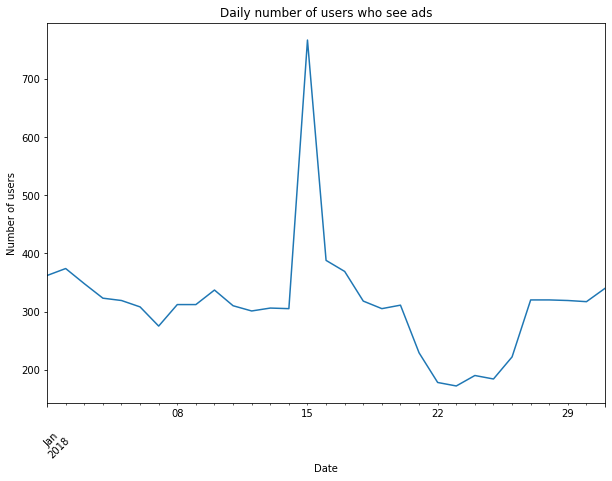

In [38]:
import matplotlib.pyplot as plt

daily_users.plot(figsize=(10, 7))
# Annotate
plt.title('Daily number of users who see ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation = 45)
plt.show()

### ***Daily marketing reach by channel***

Determine how many users are seeing the marketing assets each day. This is crucial to understand how effective our marketing efforts have been over the past month.

You'll use **`.groupby()`** and **`.nunique()`** to calculate daily users.


* Group the marketing DataFrame by `'date_served'` and count the number of unique user IDs.

# ***Conversion rate***

$$\text{Conversion rate} = \frac{\text{Number of people who convert}}{\text{Total number of people we marketed to}}$$

In [11]:
import pandas as pd

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()
total = marketing['user_id'].nunique()
conv_rate = subscribers/total
print(round(conv_rate*100, 2), '%')

13.89 %


# ***Retention rate***

$$\text{Retention rate} = \frac{\text{Number of people who remain subscribed}}{\text{Total number of people who converted}}$$

In [13]:
import pandas as pd

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

retained = marketing[marketing['is_retained']==True]['user_id'].nunique()
subscribers = marketing[marketing['converted']==True]['user_id'].nunique()
retention = retained/subscribers
print(round(retention*100, 2), '%')

66.8 %


### ***Calculating conversion rate***

Calculate ***conversion rate***, which is often the first metric you'll want to calculate when evaluating how a marketing campaign performed.

On marketing teams, ***conversion rate*** is typically the most important metric. It is one of the best ways to determine how effective a marketing team was at gaining new customers.

As a reminder, ***conversion rate*** is the percentage of the users who saw our marketing assets and subsequently became subscribers.

The formula for conversion rate is:

$$\text{Conversion rate} = \frac{\text{Number of people who convert}}{\text{Total number of people we marketed to}}$$

* Calculate the number of unique `user_ids` in `marketing` DataFrame.
* Calculate the number of people who subscribed using the `converted` column.
* Calculate the ***conversion rate***.

In [14]:
import pandas as pd

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted']==True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


 You might be wondering, is this a good conversion rate? This will depend heavily on your business. There is no particular number that all marketing teams are trying to reach. Instead, when you're working on a marketing team, it helps to look at historical data to determine whether a conversion rate is what you would expect.

### ***Calculating retention rate***

Calculate the ***retention rate***, or the number of remaining subscribers from the users who converted to your product. This can give you a sense of whether your marketing campaign converted subscribers who were actually interested in the product.

***Conversion rate*** and ***retention rate** function hand-in-hand; you could create a business with a high conversion rate by giving users a free trial, but have a low retention rate once users are charged for your services. This isn't inherently a bad thing, but it is important to provide your business stakeholders with insight into what percentage of users remain subscribers.

The formula for retention rate is:

 
$$\text{Retention rate} = \frac{\text{Number of people who remain subscribed}}{\text{Total number of people who converted}}$$

* Calculate the number of subscribers using the `user_id` and `converted` columns in the `marketing` DataFrame.
* Calculate the number of retained subscribers using the boolean columns `user_id` and `is_retained`.
* Calculate the ***retention rate***.

In [23]:
import pandas as pd

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Calculate the number of subscribers
total_subscribers = marketing[marketing['converted']==True]['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained']==True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

66.8 %


The instructor seems to load the different file from the one used on DC's browser.  The result below is opposite in that she had 9299 False and 738 True.

In [24]:
marketing.loc[marketing['is_retained'].isnull(), 'is_retained'] = True
marketing['is_retained'].value_counts()

True     9460
False     577
Name: is_retained, dtype: int64

There is no retention rate that will apply across businesses and industries. Look at historical retention rates or retention rates of companies in a similar industry to interpret your results.

# ***Segmenting using pandas - `groupby()`***

In [26]:
import pandas as pd

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Group by subscribing_channel and calculate retention
retained = marketing[marketing['is_retained']==True].groupby(['subscribing_channel'])['user_id'].nunique()
print(retained)

# Group by subscribing_channel and calculate subscribers
subscribers = marketing[marketing['converted']==True].groupby(['subscribing_channel'])['user_id'].nunique()
print(subscribers)

# Calculate the retention rate across the DataFrame
channel_retention_rate = (retained/subscribers)*100
print(channel_retention_rate)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64
subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64
subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


### ***Comparing language conversion rate (I)***

The marketing team wants to determine how effective the campaign was on converting English speakers.

Isolate the data for English speakers and calculate the conversion rate much like in the previous exercises. Remember, the formula for conversion rate is:

 $$\frac{\text{Number of people who convert}}{\text{Total number of people who we market to}}$$

Once you have the conversion rate for English speakers, you can compare it to the overall conversion rate to gain a sense of how effective the marketing campaign was among this group compared to the overall population.

* Using the `marketing` DataFrame, include only the rows where `language_displayed` is `English`.
* Calculate the total number of users in the `english_speakers` DataFrame.
* Calculate the number of conversions in the `english_speakers` DataFrame.

In [28]:
import pandas as pd

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted']==True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


### ***Comparing language conversion rate (II)***

Look at the conversion rate by the language that the marketing asset was shown in. While many of your users speak English, some prefer another language. Let's check to make sure marketing material translated well across languages.

You can analyze metrics by specific demographics using **`.groupby()`**. Rather than looking at the overall conversion rate in the dataset, you instead group by language preference, which allows you to determine whether the marketing campaign was more effective in certain languages.

* Group the marketing DataFrame by `language_displayed` and count the number of unique users in the dataset.
* Group marketing by `language_displayed` again, this time calculating the number of unique users who converted.
* Calculate the ***conversion rate*** for all languages.

In [29]:
import pandas as pd

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Group by language_displayed and count unique users
total = marketing.groupby('language_displayed')['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted']==True].groupby('language_displayed')['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


The conversion rate is much lower for English and Spanish. 

### ***Aggregating by date***

The marketing team wants to know whether there is any difference in the ***conversion rate*** based on when in the month, your users saw an ad. In this exercise, you will practice **`.groupby()`** again, this time looking at how metrics have evolved.

* Group the marketing DataFrame by `date_served` and count the number of unique users per day.
* Isolate converted users in marketing while grouping by `date_served` and counting the number of unique converted users per day.



In [30]:
import pandas as pd

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Group by date_served and count unique users
total = marketing.groupby('date_served')['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted']==True].groupby('date_served')['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


# ***Comparing Language Conversion Rate***


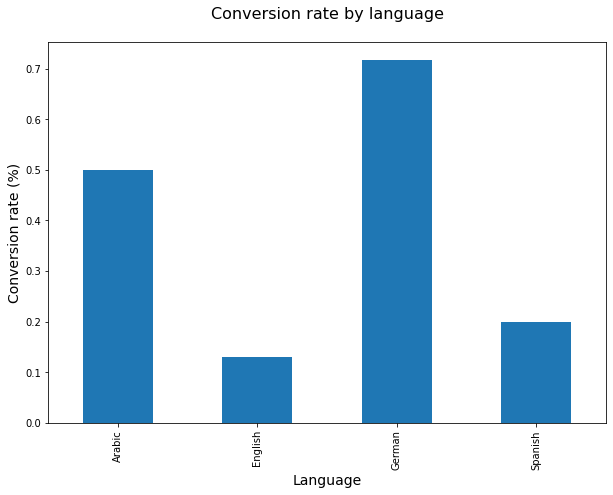

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Group by language_displayed and count unique users
total = marketing.groupby('language_displayed')['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted']==True].groupby('language_displayed')['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total

# Create a bar chart using channel retention DataFrame
language_conversion_rate.plot(kind='bar', figsize=(10,7))
# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)
# Display the plot
plt.show()

# ***Calculating subscriber quality over time***

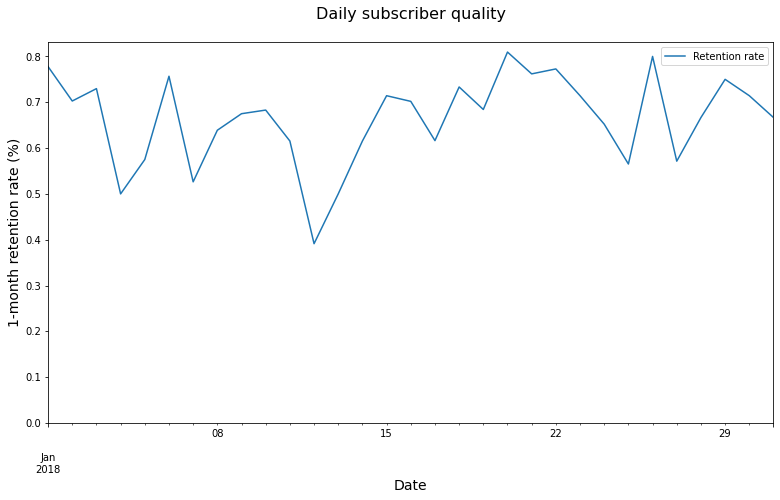

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Group by language_displayed and count unique users
total = marketing.groupby(['date_subscribed'])['user_id'].nunique()

# Group by language_displayed and sum conversions
retained = marketing[marketing['is_retained'] == True].groupby(['date_subscribed'])['user_id'].nunique()

# Calculate subscriber quality across dates
daily_retention_rate = retained/total
# daily_retention_rate = pd.DataFrame(daily_retention_rate.reset_index())  Redundant

# Rename columns
# daily_retention_rate.columns = ['date_subscribed', 'retention_rate'] Redundant

# Create a line chart using the daily_retention DataFrame
daily_retention_rate.plot(figsize=(13,7), label='Retention rate')
# Add a title and x and y-axis labels
plt.title('Daily subscriber quality\n', size = 16)
plt.ylabel('1-month retention rate (%)', size = 14)
plt.xlabel('Date', size = 14)
plt.legend()
# Set the y-axis to begin at 0
plt.ylim(0)
# Display the plot
plt.show()

### ***Creating daily conversion rate DataFrame***

To understand trends over time, you will create a new DataFrame that includes the conversion rate each day. You will follow essentially the same steps as before when you calculated the overall conversion rate, this time also grouping by the date a user subscribed.

Looking at the daily conversion rate is crucial to contextualize whether the conversion rate on a particular day was good or bad. Additionally, looking at conversion rate over time can help to surface trends such as a conversion rate that appears to be going down over time. These kinds of trends are crucial to identify for your marketing stakeholders as early as possible.

* Group marketing by `'date_served'` and calculate the unique number of user IDs.
* Select only the rows in marketing where converted equals `True`. Group the result by `'date_served'` and calculate the unique number of user IDs.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total

### ***Setting up our data to visualize daily conversion***  (This step is redundant if you are plotting time series.)

When you want to understand how your campaign performed, it is essential to look at how key metrics changed throughout the campaign. Your key metrics can help you catch problems that may have happened during the campaign, such as a bug in the checkout system that led to a dip in conversion toward the end of your campaign. Metrics over time can also surface trends like gaining more subscribers over the weekends or on specific holidays.

In this exercise, you will build upon the daily conversion rate Series `daily_conversion_rates` you built in a previous exercise. Before you can begin visualizing, you need to transform your data into an easier format to use with `pandas` and `matplotlib`.

* Reset the index of the `daily_conversion_rates` Series and use `pd.DataFrame()` to convert the results into a DataFrame named `daily_conversion_rate`.
* Rename the columns in the new DataFrame `daily_conversion_rate` to be `'date_served'` and `'conversion_rate'`.

In [ ]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())

# Rename columns
daily_conversion_rate.columns = ['date_served', 'conversion_rate']

### ***Visualize daily conversion rate***

Create a line plot to notice peaks and valleys in our conversion rate over time.

* Create a line chart using the `daily_conversion_rate`.
* Set the y-axis of your chart to begin at `0`.


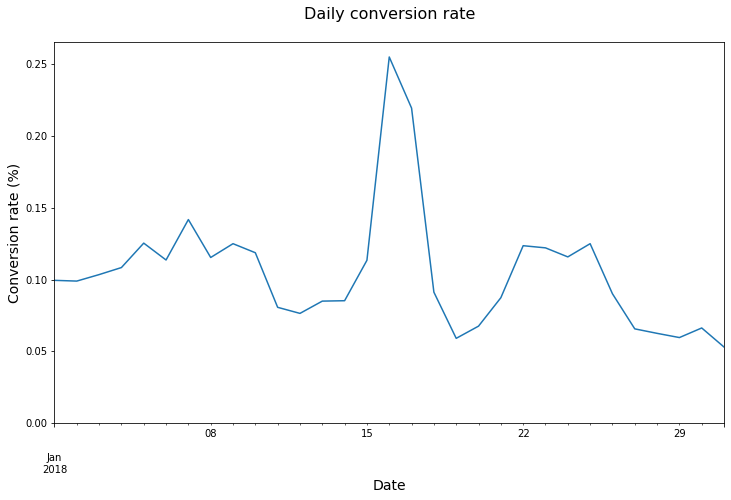

In [6]:
daily_conversion_rates.plot(figsize=(12,7))

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

# ***Grouping by multiple columns***

Suppose you want to count the number of users for each preferred language on each date

In [13]:
import pandas as pd

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

language = marketing.groupby(['date_served', 'language_preferred'])['user_id'].count()

language.head()

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
Name: user_id, dtype: int64

# ***Unstacking after groupby***



In [14]:
language = pd.DataFrame(language.unstack())

language.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,355.0,5.0,11.0
2018-01-02,4.0,397.0,6.0,10.0
2018-01-03,3.0,374.0,3.0,8.0
2018-01-04,2.0,318.0,2.0,14.0
2018-01-05,1.0,314.0,2.0,14.0


# ***Plotting preferred language over time***

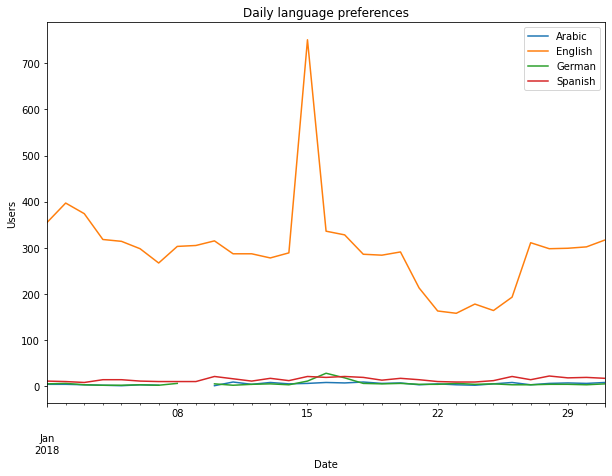

In [17]:
language.plot(figsize=(10, 7))
plt.title('Daily language preferences')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc='upper right')#, labels = language.columns.values)
plt.show()

# ***Creating grouped bar charts***



In [19]:
# Create DataFrame grouped by age and language preference
language_age = marketing.groupby(['age_group', 'language_preferred'])['user_id'].count()
language_age = pd.DataFrame(language_age.unstack())

language_age.head()

language_preferred,Arabic,English,German,Spanish
age_group,,,,
0-18 years,19,1421,31,68
19-24 years,26,1560,29,67
24-30 years,19,1442,35,72
30-36 years,19,1251,16,69
36-45 years,19,1260,19,55


# ***Plotting language preferences by age group***



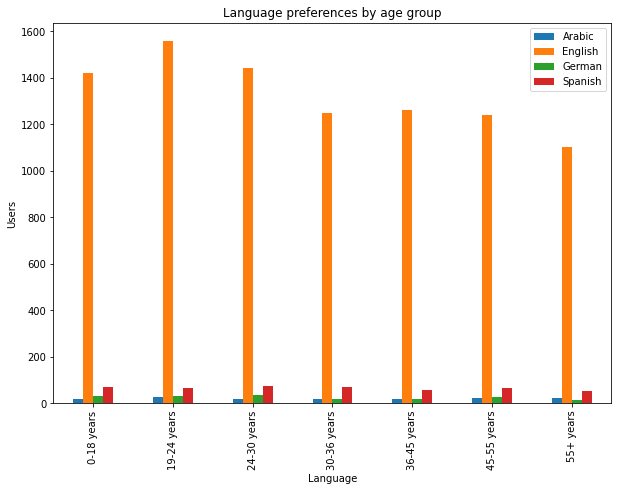

In [20]:
language_age.plot(kind='bar', figsize=(10, 7))
plt.title('Language preferences by age group')
plt.xlabel('Language')
plt.ylabel('Users')
plt.legend(loc = 'upper right', labels = language_age.columns.values)
plt.show()

### ***Marketing channels across age groups***

Some marketing stakeholders want to know if their marketing channels are reaching all users equally or if some marketing channels are serving specific age demographics.

Within a marketing team, it is common to get requests that require quick analysis and visualization. The better you are at visualizing the results, the more likely that you will effectively communicate your findings to your stakeholders.

In this exercise, you will create a grouped bar chart showing how many people each marketing channel reached by age group.

* Unstack `channel_age` with `level = 1` and transform the result into a DataFrame.
* Plot `channel_age` as a grouped bar chart.
* Add a legend in the upper right and set the labels equal to `channel_age_df.columns.values`.

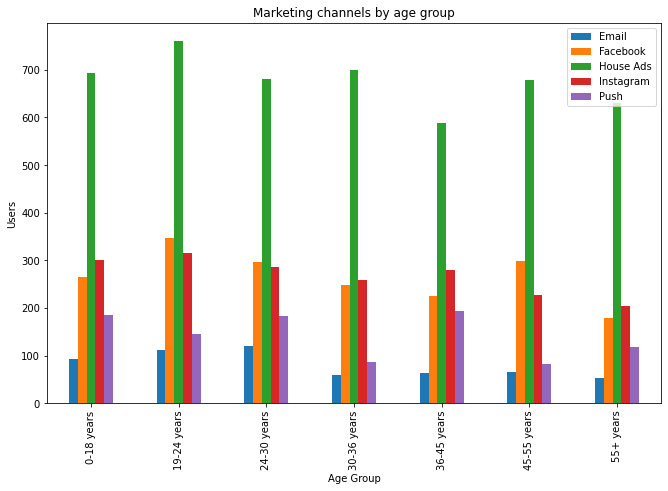

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

channel_age = marketing.groupby(['age_group', 'marketing_channel'])['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level=1))

# Plot channel_age
channel_age_df.plot(kind='bar', figsize=(11, 7))
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc='upper right', labels=channel_age_df.columns.values)
plt.show()

### ***Grouping and counting by multiple columns***

Stakeholders have begun competing to see whose channel had the best retention rate from the campaign. You must first determine how many subscribers came from the campaign and how many of those subscribers have stayed on the service.

It's important to identify how each marketing channel is performing because this will affect company strategy going forward. If one channel is outperforming others, it might signal the channel merits further investment.

You will build on what we have learned about **`.groupby()`** in previous exercises, this time grouping by multiple columns.


* Use **`.groupby()`** to calculate subscribers by `subscribing_channel` and `date_subscribed`.
* Use **`.groupby()`** to calculate retained subscribers by `subscribing_channel` and `date_subscribed`.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_total.head())

# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained']==True].groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64
date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


### ***Analyzing retention rates for the campaign***

Now that you've calculated the total subscribers and retained subscribers, you can settle the question of which channel had the highest retention rate.

Calculate the ***retention rate*** for each subscription channel and visualize results.

* Divide `retention_subs` by `retention_total` to get the ***retention rate*** by subscribing channel by date subscribed.


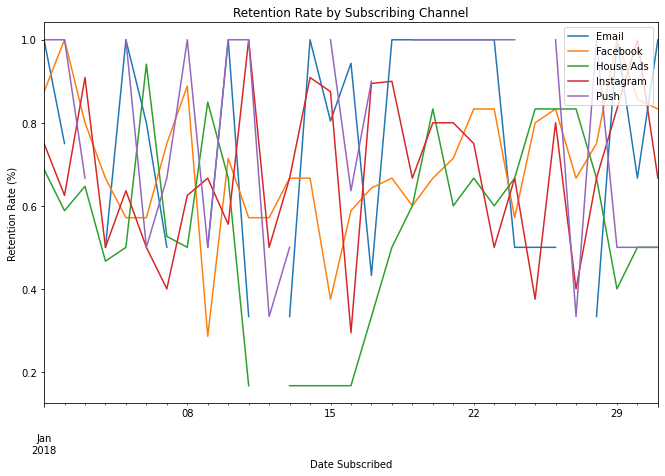

In [23]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot(figsize=(11,7))

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel("Date Subscribed")
plt.ylabel("Retention Rate (%)")
plt.legend(loc='upper right', labels=retention_rate_df.columns.values)
plt.show()

# ***A Retention Function***

In [26]:
def retention_rate(dataframe, column_names):
    # Group by column_names and calculate retention
    retained = dataframe[dataframe['is_retained']==True].groupby(column_names)['user_id'].nunique()

    # Group by column_names and calculate conversion
    converted = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()

    retention_rate = retained/converted
    retention_rate = retention_rate.fillna(0)

    return retention_rate

# ***Retention rate by channel***



In [27]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])
# marketing['is_retained'] = np.where(marketing['is_retained']==False, True, False)

daily_retention = retention_rate(marketing, ['date_subscribed','subscribing_channel'])
daily_retention = pd.DataFrame(daily_retention.unstack(level=1))

daily_retention.head()

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
2018-01-01,1.00,0.88,0.69,0.75,1.00
2018-01-02,0.75,1.00,0.59,0.62,1.00
2018-01-03,0.00,0.80,0.65,0.91,0.67
2018-01-04,1.00,0.67,0.47,0.50,0.00
2018-01-05,1.00,0.57,0.50,0.64,1.00


# ***Plotting daily retention by channel***



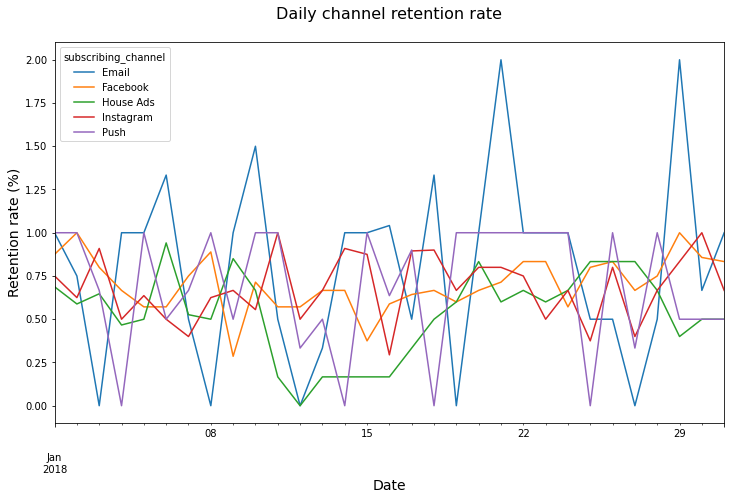

In [28]:
import matplotlib.pyplot as plt

daily_retention.plot(figsize=(12, 7))
plt.title('Daily channel retention rate\n', size=16)
plt.ylabel('Retention rate (%)', size=14)
plt.xlabel('Date', size=14)
plt.show()

# ***Plotting function***


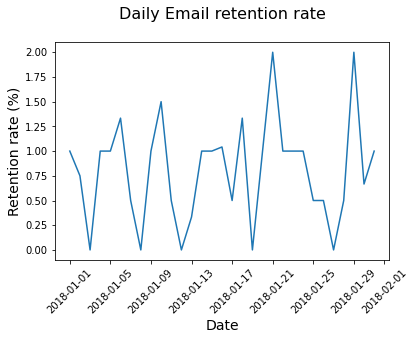

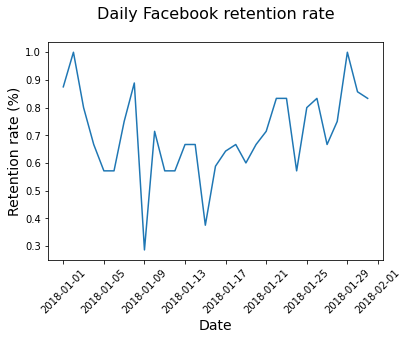

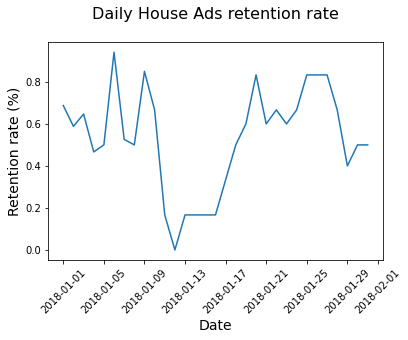

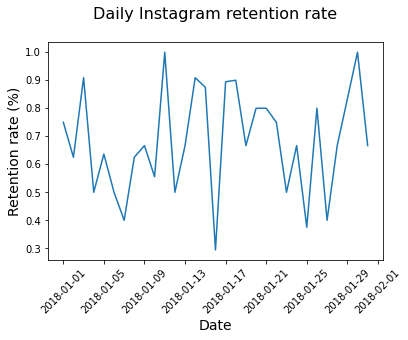

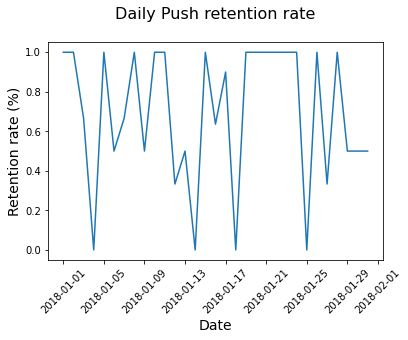

In [29]:
def plotting(dataframe):
    for column in dataframe:
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + column + ' retention rate\n', size = 16)
        plt.ylabel('Retention rate (%)', size=14)
        plt.xlabel('Date', size=14)
        plt.xticks(rotation=45)
        plt.show()

plotting(daily_retention)

### ***Building a conversion function***

You've been doing a lot of repetitive calculations. Anytime you notice repetition in your work, consider automation. The more of the low-variance work you can automate, the more time you will have to explore new and interesting data science topics at work. This will both impress your marketing stakeholders and be more fun!

Since you know the format of the marketing DataFrame will remain the same over time, you can build a function to enable you to calculate conversion rate across any sub-segment you want on the fly.

Build a function that takes a DataFrame and list of column names and outputs the ***conversion rate*** across the column(s).

* Isolate rows in the user inputted dataframe where users were converted, then group by the list of user inputted `column_names` and count the number of unique converted users.
* Group the user inputted dataframe by the list of user inputted `column_names` and calculate the total number of users.
* Fill any missing values in `conversion_rate` with `0`.


In [30]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

### ***Test and visualize conversion function***

Calculate the ***conversion rate***. A task that in above lessons took multiple steps. By automating the repetitive parts of your work, you'll be able to spend more time doing complex analyses.

* Use your `conversion_rate()` function to calculate the conversion rate in marketing by `date_served` and `age_group` and store your results in `age_group_conv`.
* Unstack `age_group_conv` at level equal to `1` and wrap that in a call to **`pd.DataFrame()`** to create `age_group_df`.
* Create a line chart to display your results from `age_group_df`.

date_served  age_group  
2018-01-01   0-18 years    0.16
             19-24 years   0.20
             24-30 years   0.11
             30-36 years   0.04
             36-45 years   0.04
                           ... 
2018-01-31   24-30 years   0.06
             30-36 years   0.00
             36-45 years   0.04
             45-55 years   0.02
             55+ years     0.03
Name: user_id, Length: 217, dtype: float64


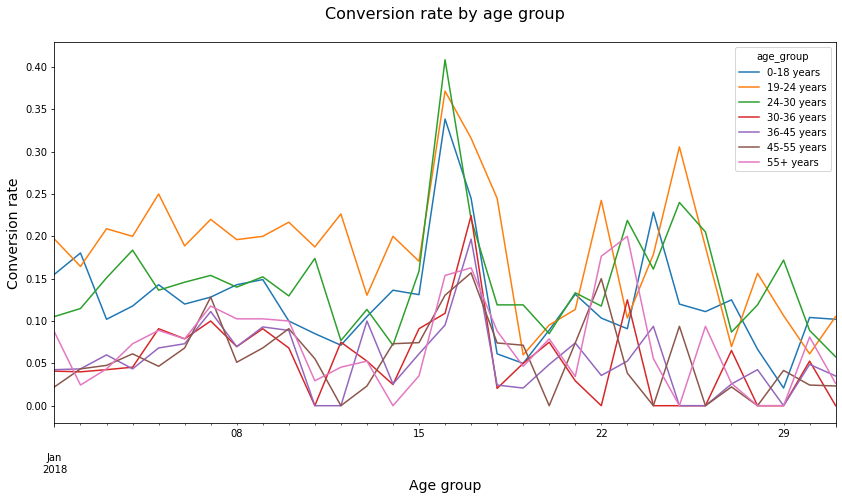

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack to create a DataFrame
age_group_df = age_group_conv.unstack(level=1) # <<< pd.DataFrame() is redundant

# Visualize conversion by age_group
age_group_df.plot(figsize=(14,7))
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

### ***Plotting function***

Now that you've looked at conversion rate by age, you want to see if that trend has changed over time. Marketing has been changing their strategy and wants to make sure that their new method isn't alienating age groups that are less comfortable with their product. However, to do so, you need to create a plotting function to make it easier to visualize your results.

In this exercise, you will build a function to plot the results of your ***conversion rate*** function.

* Create a **`for`** loop for each column in the dataframe.
* Plot a line chart of the column by the DataFrame's index.
* Show the plot.

In [36]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()  
        plt.clf()

### ***Putting it all together***

Your marketing stakeholders have requested a report of the daily **conversion rate** for each age group, and they need it as soon as possible. They want you to refresh this report on a monthly cadence. This is a perfect opportunity to utilize your functions. Not only will the functions help you get this report out promptly today, but it will also help each month when it's time for a refresh of the data.

Remember, `conversion_rate()` takes a DataFrame and a list of columns to calculate the ***conversion rate***.

* Using `conversion_rate()` function, create a new DataFrame called `age_group_conv` which contains ***conversion rate*** by `date_served` and `age_group` from the `marketing` DataFrame.
* Unstack `age_group_conv` to create a DataFrame with each age group as a column. 
* Use your `plotting_conv()` function to plot the conversion rates for each age group.

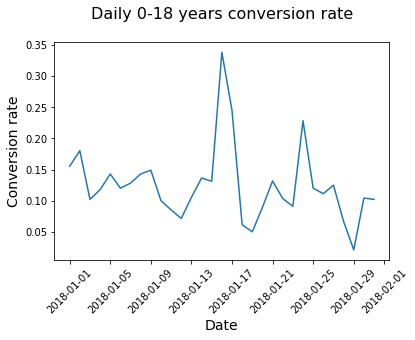

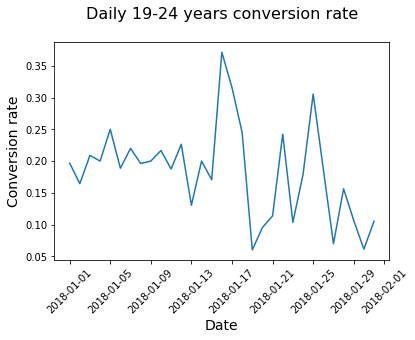

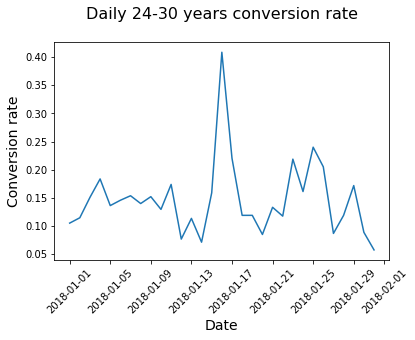

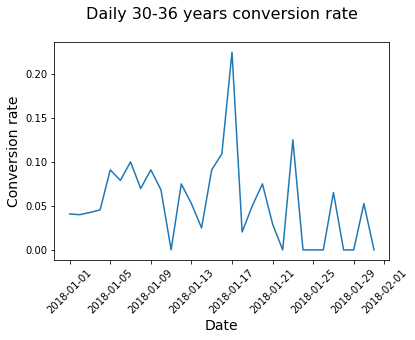

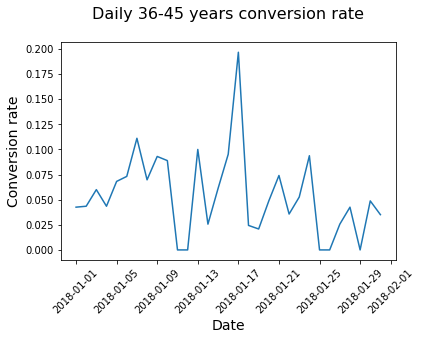

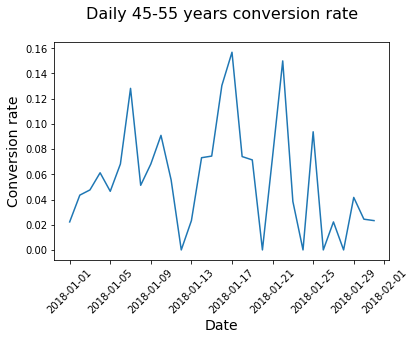

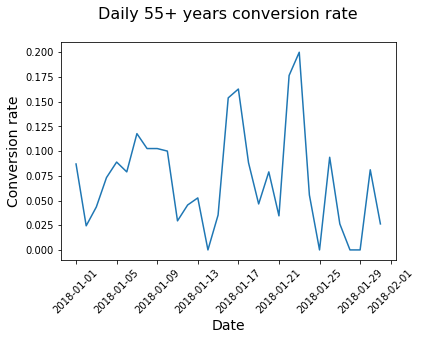

<Figure size 432x288 with 0 Axes>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation=45)
        # Show plot
        plt.show()  
        plt.clf()

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

###############################################################################

# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

# ***Day of week trends***

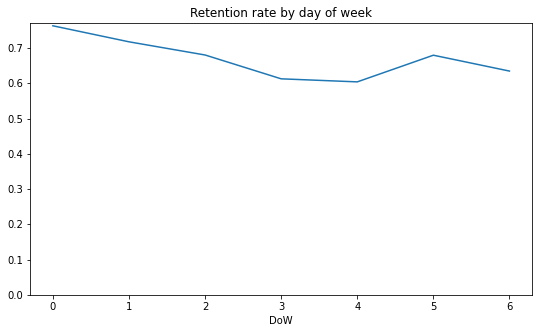

In [42]:
DoW_retention = retention_rate(marketing, ['DoW'])

DoW_retention.plot(figsize=(9,5))
plt.title('Retention rate by day of week')
plt.ylim(0)
plt.show()

### ***House ads conversion rate***

The house ads team has become worried about some irregularities they've noticed in ***conversion rate***. It is common for stakeholders to come to you with concerns they've noticed around changing metrics. As a data scientist, it's your job to determine whether these changes are natural fluctuations or if they require further investigation.

In this exercise, you'll try out your `conversion_rate()` and `plotting_conv()` functions out on marketing looking at conversion rate by `'date_served'` and `'marketing_channel'`.

* Use your `conversion_rate()` function on marketing to determine conversion rate by `'date_served'` and `'marketing_channel'`.
* Unstack `daily_conv_channel` with level equal to one and convert the result into a DataFrame.
* Try out your `plotting_conv()` function on `daily_conv_channel`.

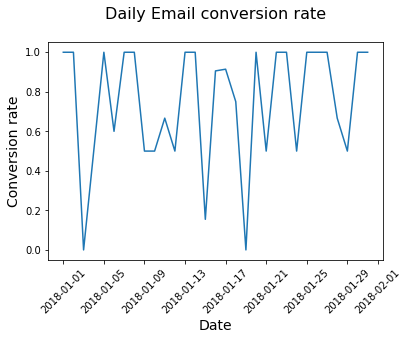

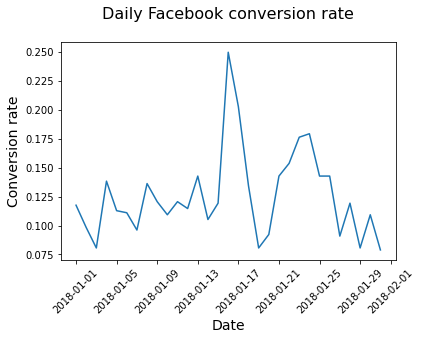

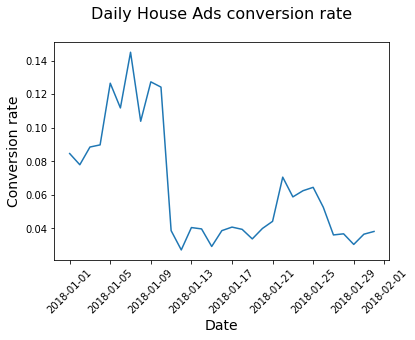

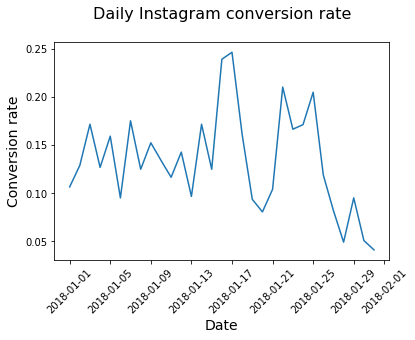

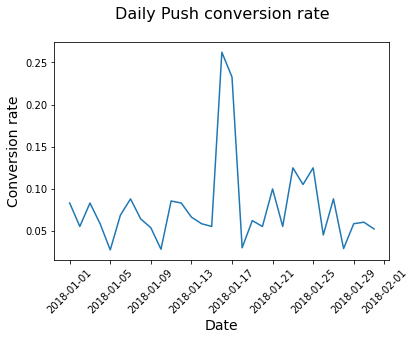

<Figure size 432x288 with 0 Axes>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation=45)
        # Show plot
        plt.show()  
        plt.clf()

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

###############################################################################

# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level=1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

### ***Analyzing House ads conversion rate***

Now that you have confirmed that house ads conversion has been down since January 11, you will try to identify potential causes for the decrease.

As a data scientist supporting a marketing team, you will run into fluctuating metrics all the time. It's vital to identify if the fluctuations are due to expected shifts in user behavior (i.e., differences across the day of the week) versus a larger problem in technical implementation or marketing strategy.

In this exercise, we will begin by checking whether users are more likely to convert on weekends compared with weekdays and determine if that could be the cause for the changing house ads ***conversion rate***.

* Add a day of week column to the `marketing` DataFrame using `dt.dayofweek` based on the `'date_served'` column.
* Use `conversion_rate` to calculate conversion by the day of week and marketing channel and store the results in `DoW_conversion`.
* Create a line plot of the results, set the y-axis to begin at `0` and display the plot.

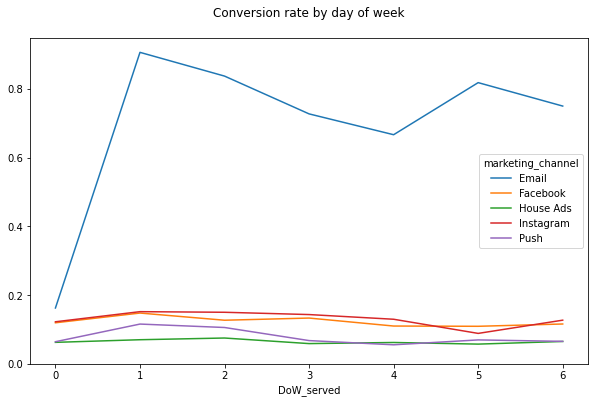

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation=45)
        # Show plot
        plt.show()  
        plt.clf()

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

###############################################################################

# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot(figsize=(10,6))
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

As you can see, email is particularly high and may be reflective of a tracking error, but house ads appear stable across the week with a slight peak on Tuesday. You will investigate further.

### ***House ads conversion by language***

Now that you've ruled out natural fluctuations across the day of the week a user saw our marketing assets as they cause for decreasing house ads conversion, you will take a look at conversion by language over time. Perhaps the new marketing campaign does not apply broadly across different cultures.

Ideally, the marketing team will consider cultural differences prior to launching a campaign, but sometimes mistakes are made, and it will be your job to identify the cause. Often data scientists are the first line of defense to determine what went wrong with a marketing campaign. It's your job to think creatively to identify the cause.

* Create a new DataFrame `house_ads` by isolating the rows from marketing where `marketing_channel` equals `'House Ads'`.
* Run your `conversion_rate()` function on the `house_ads` DataFrame grouping by `date_served` and `language_displayed`.
* Use the `plotting_conv()` function on `conv_lang_df` to display your results.


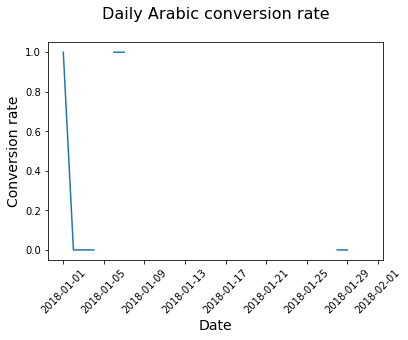

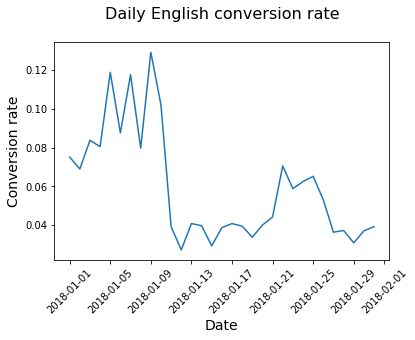

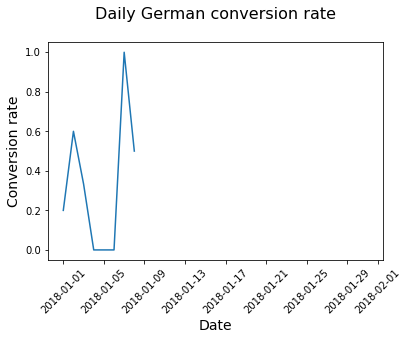

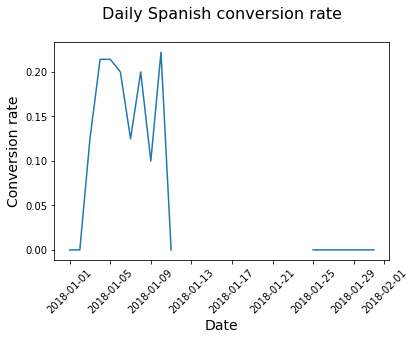

<Figure size 432x288 with 0 Axes>

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation=45)
        # Show plot
        plt.show()  
        plt.clf()

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

###############################################################################

# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel']=='House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served',  'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = conv_lang_channel.unstack()

# Use your plotting function to display results
plotting_conv(conv_lang_df)

As you can see, the English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period. You will investigate further.

### ***Creating a DataFrame for house ads***

The house ads team is concerned because they've seen their ***conversion rate*** drop suddenly in the past few weeks. In the above exercises, you confirmed that conversion is down because you noticed a pattern around language preferences.

As a data scientist, it is your job to provide your marketing stakeholders with as specific feedback as possible as to what went wrong to maximize their ability to correct the problem. It is vital that you not only say "looks like there's a language problem," but instead identify what the problem is specifically so that the team doesn't repeat their mistake.

* Use **`np.where()`** to create a new column in `house_ads` called `'is_correct_lang'` whose values are `'Yes'` if `'language_displayed'` is equal to `'language_preferred'` and `'No'` otherwise.
* Group by `date_served` and `is_correct_lang` to get a daily count of the ads served.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

###############################################################################

# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel']=='House Ads']

# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(house_ads['language_displayed'] == house_ads['language_preferred'], 'Yes', 'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['user_id'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = language_check.unstack().fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01       2.00 189.00
2018-01-02       3.00 247.00
2018-01-03       0.00 220.00
2018-01-04       0.00 168.00
2018-01-05       0.00 160.00
2018-01-06       1.00 151.00
2018-01-07       2.00 130.00
2018-01-08       0.00 154.00
2018-01-09       0.00 157.00
2018-01-10       0.00 170.00
2018-01-11      20.00 135.00
2018-01-12      18.00 130.00
2018-01-13      26.00 122.00
2018-01-14      20.00 131.00
2018-01-15      16.00 192.00
2018-01-16      28.00 127.00
2018-01-17      21.00 127.00
2018-01-18      31.00 121.00
2018-01-19      22.00 127.00
2018-01-20      28.00 124.00
2018-01-21      14.00 100.00
2018-01-22      13.00  72.00
2018-01-23      16.00  69.00
2018-01-24      13.00  83.00
2018-01-25      19.00  74.00
2018-01-26      24.00  92.00
2018-01-27      18.00 149.00
2018-01-28      28.00 136.00
2018-01-29      24.00 142.00
2018-01-30      23.00 145.00
2018-01-31      23.00 135.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


As you can see, the language displayed didn't match the language preferred from Jan 11th onward.  This is the reason why the conversion rate in House Ads dropped.

### ***Confirming house ads error***

Now that you've created a DataFrame that checks whether users see ads in the correct language let's calculate what percentage of users were not being served ads in the right language and plot your results.

* Add a `pct` column to `language_check_df` which divides the count where language is correct by the row sum extracted using the **`.sum()`** method.
* Make a line plot with the `date` as the x-axis and the `pct` column as the y-axis and show your results.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


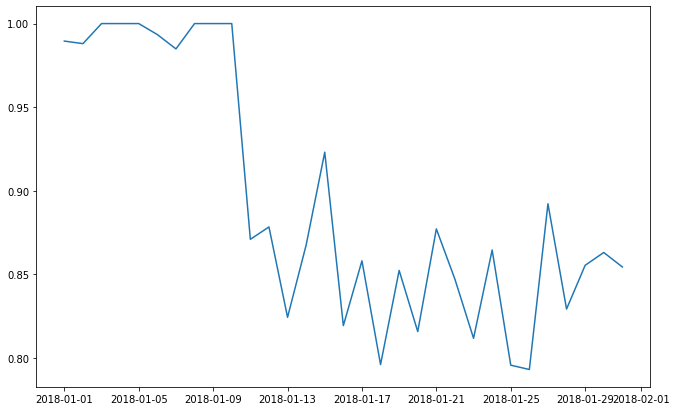

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel']=='House Ads']

# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(house_ads['language_displayed'] == house_ads['language_preferred'], 'Yes', 'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['user_id'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = language_check.unstack().fillna(0)

###############################################################################

# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.figure(figsize=(11,7))
plt.plot(language_check_df.index, language_check_df['pct'])
plt.show()

You have shown that house ads have been underperforming due to serving all ads in English rather than each user's preferred language.

# ***Assessing impact*** (*Be careful, the instructor was not careful typing the slide.  The same results occur in exercise though.*)


In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation=45)
        # Show plot
        plt.show()  
        plt.clf()

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel']=='House Ads']

# Calculate pre-error conversion rate
# Bug arose sometime around '2018-01-11'
house_ads_no_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_no_bug,['language_displayed'])
lang_conv

language_displayed
Arabic    0.50
English   0.10
German    0.44
Spanish   0.17
Name: user_id, dtype: float64

In [2]:
# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


# ***Daily conversion***

In [3]:
# Create actual conversion DataFrame
language_conversion = house_ads.groupby(['date_served', 'language_preferred']).agg({'user_id':'nunique','converted':'sum'})
expected_conversion = language_conversion.unstack(level=1)

expected_conversion.head()

user_id                 ... converted               
language_preferred  Arabic English German  ...   English German Spanish
date_served                                ...                         
2018-01-01            2.00  171.00   5.00  ...        13      1       0
2018-01-02            3.00  200.00   5.00  ...        14      3       0
2018-01-03            2.00  179.00   3.00  ...        15      1       1
2018-01-04            2.00  149.00   2.00  ...        12      0       3
2018-01-05             NaN  143.00   1.00  ...        17  False       3

[5 rows x 8 columns]

# ***Create English conversion rate column***



In [4]:
# Create English conversion rate column for affected period

expected_conversion['actual_english_conversions'] = expected_conversion.loc['2018-01-11':'2018-01-31', ('converted', 'English')]
expected_conversion.loc['2018-01-09':'2018-01-15']

user_id          ... converted actual_english_conversions
language_preferred  Arabic English  ...   Spanish                           
date_served                         ...                                     
2018-01-09             NaN  147.00  ...         1                        NaN
2018-01-10             NaN  147.00  ...         4                        NaN
2018-01-11            7.00  133.00  ...         0                          6
2018-01-12            3.00  129.00  ...         1                          3
2018-01-13            6.00  121.00  ...         0                          5
2018-01-14            5.00  131.00  ...         0                          6
2018-01-15            2.00  189.00  ...         0                          6

[7 rows x 9 columns]

# ***Calculating daily expected conversion rate***

In [5]:
# Create expected conversion rates for each language

expected_conversion['expected_spanish_rate'] = expected_conversion['actual_english_conversions']*spanish_index
expected_conversion['expected_arabic_rate'] =  expected_conversion['actual_english_conversions']*arabic_index
expected_conversion['expected_german_rate'] =  expected_conversion['actual_english_conversions']*german_index
expected_conversion.loc['2018-01-09':'2018-01-12']

user_id          ... expected_arabic_rate expected_german_rate
language_preferred  Arabic English  ...                                          
date_served                         ...                                          
2018-01-09             NaN  147.00  ...                  NaN                  NaN
2018-01-10             NaN  147.00  ...                  NaN                  NaN
2018-01-11            7.00  133.00  ...                30.27                26.91
2018-01-12            3.00  129.00  ...                15.14                13.46

[4 rows x 12 columns]

# ***Calculating daily expected conversions***

In [6]:
# Multiply total ads served by expected conversion rate
expected_conversion['expected_spanish_conversions'] = expected_conversion['expected_spanish_rate']/100*expected_conversion[('user_id','Spanish')]
expected_conversion['expected_arabic_conversions'] = expected_conversion['expected_arabic_rate']/100*expected_conversion[('user_id','Arabic')]
expected_conversion['expected_german_conversions'] = expected_conversion['expected_german_rate']/100*expected_conversion[('user_id','German')]
expected_conversion.loc['2018-01-09':'2018-01-12']

user_id  ... expected_german_conversions
language_preferred  Arabic  ...                            
date_served                 ...                            
2018-01-09             NaN  ...                         NaN
2018-01-10             NaN  ...                         NaN
2018-01-11            7.00  ...                        0.54
2018-01-12            3.00  ...                        0.54

[4 rows x 15 columns]

In [7]:
bug_period = expected_conversion.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = bug_period['expected_spanish_conversions'].sum() + bug_period['expected_arabic_conversions'].sum() + bug_period['expected_german_conversions'].sum()

# Calculate how many subscribers we actually got
actual_subs = bug_period[('converted','Spanish')].sum() + bug_period[('converted','Arabic')].sum() + bug_period[('converted','German')].sum()
lost_subs = expected_subs - actual_subs
print(lost_subs)

32.144143192488265


### ***Setting up conversion indexes***

Now that you've determined that language is, in fact, the issue with House Ads conversion, stakeholders need to know how many subscribers they lost as a result of this bug.

In this exercise, you will index non-English language conversion rates against English conversion rates in the time period before the language bug arose.

* Create a new DataFrame, `house_ads_bug`, that contains only the rows from `house_ads` with `'date_served'` prior to `'2018-01-11'`.
* Use your `conversion_rate()` function on the `house_ads_bug` DataFrame and the `'language_displayed'` column.
* Using the appropriate row, divide the `Spanish`, `Arabic` and `German` columns of `lang_conv` by the `English` column.

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel']=='House Ads']

###############################################################################

# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed'])

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


Now that you've created indexes for each language compared with English, you can assess what conversion rate should have been during the rest of the month.

### ***Analyzing user preferences***

To understand the true impact of the bug, it is crucial to determine how many subscribers we would have expected had there been no language error. This is crucial to understanding the scale of the problem and how important it is to prevent this kind of error in the future.

In this step, you will create a new DataFrame that you can perform calculations on to determine the expected number of subscribers. This DataFrame will include how many users prefer each language by day. Once you have the DataFrame, you can begin calculating how many subscribers you would have expected to have had the language bug not occurred.

* Group `house_ads` by `date_served` and `language_preferred`.
* Use a dictionary within a call to **`.agg()`** to calculate the number of unique users and sums the number of converted users.
* Unstack converted at `level=1`.

In [2]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 'language_preferred']).agg({'user_id':'nunique', 'converted':'sum'})

# Unstack converted
converted_df = converted.unstack(level=1)
converted_df.head()

user_id                 ... converted               
language_preferred  Arabic English German  ...   English German Spanish
date_served                                ...                         
2018-01-01            2.00  171.00   5.00  ...        13      1       0
2018-01-02            3.00  200.00   5.00  ...        14      3       0
2018-01-03            2.00  179.00   3.00  ...        15      1       1
2018-01-04            2.00  149.00   2.00  ...        12      0       3
2018-01-05             NaN  143.00   1.00  ...        17  False       3

[5 rows x 8 columns]

### ***Creating a DataFrame based on indexes***

Now that you've created an index to compare English conversion rates against all other languages, you will build out a DataFrame that will estimate what daily conversion rates should have been if users were being served the correct language.

An expected conversion DataFrame named `converted` has been created for you grouping `house_ads` by `date_served` and `language_preferred`. It contains a count of unique users as well as the number of conversions for each language, each day.

For example, you can access the number of Spanish-speaking users who received house ads using `converted[('user_id','Spanish')]`.

* Use **`.loc`** to create the column `english_conv_rate` in `converted` with the English conversion rate between `'2018-01-11'` and `'2018-01-31'`.
* Create expected conversion columns for each language by multiplying `english_conv_rate` by each language index (`spanish_index`, `arabic_index` or `german_index`).
* Multiply each language's expected conversion rate by the number of users who should have received house ads.

In [3]:
converted = converted_df

# Create English conversion rate column for affected period
converted['english_conv_rate'] = converted.loc['2018-01-11':'2018-01-31'][('converted', 'English')]

# Create expected conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate'] * spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate']* arabic_index
converted['expected_german_rate'] = converted['english_conv_rate'] * german_index

# Multiply number of users by the expected conversion rate
converted['expected_spanish_conv'] = converted['expected_spanish_rate']*converted[('user_id','Spanish')]/100
converted['expected_arabic_conv'] = converted['expected_arabic_rate']*converted[('user_id','Arabic')]/100
converted['expected_german_conv'] = converted['expected_german_rate']*converted[('user_id','German')]/100

Now, you will assess how many subscribers you lost due to the language discrepancy.

### ***Assessing bug impact***

It's time to calculate how many subscribers were lost due to mistakenly serving users English rather than their preferred language. Once the team has an estimate of the impact of this error, they can determine whether it's worth putting additional checks in place to avoid this in the future—you might be thinking, of course, it's worth it to try to prevent errors! In a way, you're right, but every choice a company makes requires work and funding. The more information your team has, the better they will be able to evaluate this trade-off.

The DataFrame `converted` has already been loaded for you. It contains expected subscribers columns for Spanish, Arabic and German language speakers named `expected_spanish_conv`, `expected_arabic_conv` and `expected_german_conv` respectively.

* Create the `converted` DataFrame by using **`.loc`** to select only rows where the date is between `'2018-01-11'` and `'2018-01-31'`.
* Sum the expected subscribers columns for each language in `converted` and store the results in expected_subs.
* Sum the actual subscribers for each language in `converted` and store the results in `actual_subs`.
* Subtract `actual_subs` from `expected_subs` to determine how many subscribers were lost due to the bug.

In [5]:
# Use .loc to slice only the relevant dates
converted = converted.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted[('converted','Spanish')].sum() + converted[('converted','Arabic')].sum() + converted[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

32.144143192488265


32 subscribers may not seem like many, but for a small company this can be vitally important, especially when expanding to new markets.



# ***A/B Test allocation***

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
354,a100000526,2018-01-01,Email,personalization,True,Arabic,Arabic,0-18 years,2018-01-01,NaT,Email,True
358,a100000530,2018-01-05,Email,personalization,True,Arabic,Arabic,19-24 years,2018-01-05,NaT,Email,True
362,a100000534,2018-01-09,Email,personalization,False,English,English,45-55 years,2018-01-09,NaT,Email,True
366,a100000538,2018-01-13,Email,personalization,True,Arabic,Arabic,24-30 years,2018-01-13,2018-01-23,Email,False
370,a100000542,2018-01-17,Email,personalization,True,English,English,0-18 years,2018-01-17,2018-02-12,Email,False


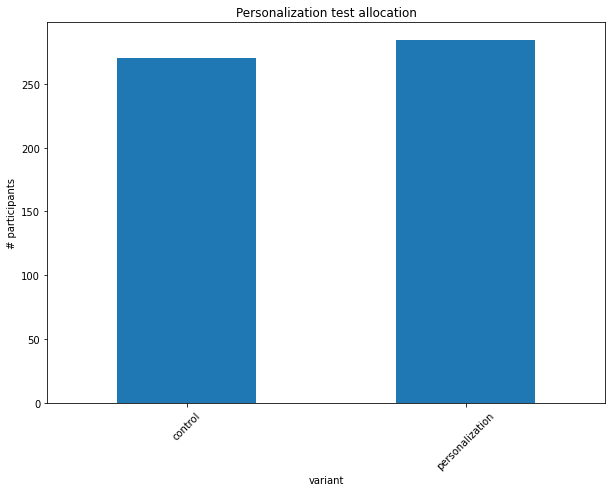

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

email = marketing[marketing['marketing_channel'] == 'Email']
allocation = email.groupby(['variant'])['user_id'].nunique()
allocation.plot(kind='bar', figsize=(10,7))
plt.title('Personalization test allocation')
plt.xticks(rotation=45)
plt.ylabel('# participants')
plt.show()

# ***Setting up our data to evaluate the test***



In [14]:
# Group by user_id and variant
subscribers = email.groupby(['user_id', 'variant'])['converted'].max() # << เลือกค่า True จากคอลัมน์ converted
subscribers = subscribers.unstack()
display(subscribers.head())

# Drop missing values from the control column
control = subscribers['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers['personalization'].dropna()

variant,control,personalization
user_id,,
a100000526,NaN,True
a100000530,NaN,True
a100000534,NaN,False
a100000538,NaN,True
a100000542,NaN,True


# ***Conversion rates***


In [15]:
import numpy as np

print("Control conversion rate:", np.mean(control))
print("Personalization conversion rate:", np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


### ***Test allocation***

The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

Before you begin analyzing the results, you will check to ensure users were allocated equally to the test and control groups.

* Isolate the rows of marketing where the `'marketing_channel'` is `'Email'` and store the results in `email`.
* Group `marketing` by `variant` and sum the unique users and store the results in `alloc`.
* Plot the results of `alloc` in a bar chart.

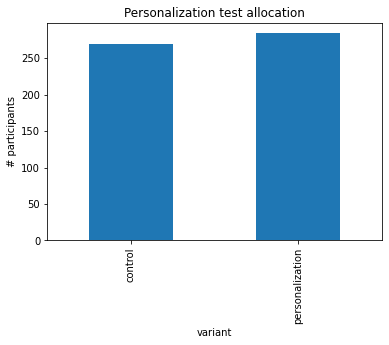

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Subset the DataFrame
email = marketing[marketing['marketing_channel']=='Email']

# Group the email DataFrame by variant 
alloc = email.groupby('variant')['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

There's a slight difference in allocation, but it's within the expected range so you can continue with your analysis.

### ***Comparing conversion rates***

Now that we know allocation is relatively even, let's look at the ***conversion rate*** for the control and personalization. Since we chose ***conversion rate*** as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. While we will dive in deeper in subsequent exercises, measuring the difference between the key metric in the control and the treatment is the most important part of evaluating the success of an A/B test.

The DataFrame `email` has been loaded in your workspace which contains only rows from the marketing DataFrame where `marketing_channel` is `'Email'`.

* Group the `email` DataFrame by `user_id` and `variant` while selecting the maximum value of the `converted` column and store the results in `subscribers`.
* Drop missing values from the control column of `subscribers_df`.
* Drop missing values from the personalization column of `subscribers_df`.
* Calculate the ***conversion rate*** for both `personalization` and `control` using the appropriate function for each.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Subset the DataFrame
email = marketing[marketing['marketing_channel']=='Email']

#############################################################################

# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


You can see that personalization converted users at a higher rate than the control. Next, you will build a lift function to quantify by how much.

# ***Treatment performance compared to the control***

$$Lift = \frac{\text{Treatment conversion rate} - \text{Control conversion rate}}{\text{Control conversion rate}}$$

In [18]:
# Calcuate the mean of a and b
a_mean = np.mean(control)
b_mean = np.mean(personalization)

# Calculate the lift using a_mean and b_mean
lift = (b_mean-a_mean)/a_mean
print("lift:", str(round(lift*100, 2)) + '%')  

lift: 38.85%


# ***T-test in Python***



In [19]:
from scipy.stats import ttest_ind

t = ttest_ind(control, personalization)
print(t)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)


### ***Creating a lift function***

Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control. The formula for lift can be found below:

$$\frac{\text{Treatment conversion rate} - \text{Control conversion rate}}{\text{Control conversion rate}}$$

The result is the percent difference between the control and treatment.


* Calculate the mean of `a` and `b` using **`np.mean()`**.
* Use `a_mean` and `b_mean` to calculate the `lift` of the treatment.
* Print the results of the `lift()` function you created using the `control` and `personalization` variables.

In [20]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Subset the DataFrame
email = marketing[marketing['marketing_channel']=='Email']

# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()


#############################################################################

def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean - a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


# ***Personalization test segmented by language***

In [22]:
import numpy as np
import pandas as pd

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

for language in np.unique(marketing['language_displayed'].values):
     print(language)

Arabic
English
German
Spanish


# ***Isolate the relevant data***

In [ ]:
for language in np.unique(marketing['language_displayed'].values):
    language_data = marketing[(marketing['marketing_channel'] == 'Email') & (marketing['language_displayed'] == language)]

# ***Isolate subscribers***

In [ ]:
for language in np.unique(marketing['language_displayed'].values):
    
    language_data = marketing[(marketing['marketing_channel'] == 'Email') & (marketing['language_displayed'] == language)]
    subscribers = language_data.groupby(['user_id', 'variant'])['converted'].max()
    

# ***Isolate control and personalization***

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
pd.options.display.float_format = '{:,.2f}'.format

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean - a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'

for language in np.unique(marketing['language_displayed'].values):
    print(language)
    language_data = marketing[(marketing['marketing_channel'] == 'Email') & (marketing['language_displayed'] == language)]
    subscribers = language_data.groupby(['user_id', 'variant'])['converted'].max()
    subscribers = subscribers.unstack()
    control = subscribers['control'].dropna()
    personalization = subscribers['personalization'].dropna()

    print('lift:', lift(control, personalization))
    print('t-statistic:', ttest_ind(control, personalization), '\n\n')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




### ***Building an A/B test segmenting function***

In the previous lesson, you observed that your personalization experiment is highly statistically significant. However, when running experiments, it is important to check how new features are affecting specific demographics. Sometimes features that are highly appealing to one group are less appealing to others.

Since you want to segment our data multiple times, you will build a function `ab_segmentation()` that analyzes the impact of your A/B tests on segments of data that you can reuse each time you want to conduct this kind of analysis.

Your function will take in a column name and run through each unique value in that column calculating lift and statistical significance.

* Build a for loop within our `ab_segmentation()` function that runs through each unique value in the user-inputted column name segment.
* Isolate the rows in `marketing` where the `marketing channel` is `'Email'` and the user-inputted column `segment` equals `subsegment`.
* Print the results of the `lift()` and **`stats.ttest_ind()`** functions.

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

def ab_segmentation(segment):
  # Build a for loop for each subsegment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]
      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = subscribers.unstack() 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control, personalization)) 
      print('t-statistic:', ttest_ind(control, personalization), '\n\n')

### ***Using your segmentation function***

Now that you've generated an `ab_segmentation()` function, it's time to test it out.

Often a treatment will not affect all people uniformly. Some people will love a particular marketing campaign while others hate it. As a marketing data scientist, it's your responsibility to enable your marketing stakeholders to target users according to their preferences.

We will run through two segments in our data that may be relevant to assessing the impact of our test.

When using the `ab_segmentation()` function, remember to input the column name in quotes (i.e., `'language_displayed'`)

* Run our `ab_segmentation()` function on `'language_displayed'`.
* Run our `ab_segmentation()` function on `'age_group'`.

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean - a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'

def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]
      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = subscribers.unstack()
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control, personalization)) 
      print('t-statistic:', ttest_ind(control, personalization), '\n\n')

# Use ab_segmentation on language displayed
ab_segmentation('language_displayed')

# Use ab_segmentation on age group
ab_segmentation("age_group")

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 


0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, p

You found that personalization was extremely effective for younger groups but less effective than the control for older groups. One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy.